# Compiling and Running Go Code

Cfiddle can compile and measure [Go](https://go.dev/)!

There are few pieces missing:

1. Generating assembly.
2. Turning compiler optimizations on and off.

If you're a Go hacker and would like support improved, please let me know.


## Simple Example

In [16]:
from cfiddle import *


In [15]:
source = code(r"""
import "sort"
// This 'export' comment exposes `run` so we can invoke it
//export run
func run(count int){
    var arr = make([]int,count)
    for i:=0;i<count;i++{
        arr[i] = i;
    }
    C.start_measurement(nil) // pass either `nil` or a tag name to start_measurement()
    sort.Ints(arr)
    C.end_measurement()
}
""", language="go")
built = build(source, verbose=True)

  0%|          | 0/1 [00:00<?, ?it/s]

['make', '-f', '/cse142L/fiddle/src/cfiddle/resources/make/cfiddle.make', 'BUILD=.cfiddle/builds/build/_eb88247fa424d51be53d710ca155f97a', 'CFIDDLE_INCLUDE=/cse142L/fiddle/src/cfiddle/resources/include', 'CFIDDLE_VPATH=.cfiddle/builds/anonymous_code:.cfiddle/builds/build/_eb88247fa424d51be53d710ca155f97a', '.cfiddle/builds/build/_eb88247fa424d51be53d710ca155f97a/eb88247fa424d51be53d710ca155f97a.so']
make -f /cse142L/fiddle/src/cfiddle/resources/make/cfiddle.make BUILD=.cfiddle/builds/build/_eb88247fa424d51be53d710ca155f97a CFIDDLE_INCLUDE=/cse142L/fiddle/src/cfiddle/resources/include CFIDDLE_VPATH=.cfiddle/builds/anonymous_code:.cfiddle/builds/build/_eb88247fa424d51be53d710ca155f97a .cfiddle/builds/build/_eb88247fa424d51be53d710ca155f97a/eb88247fa424d51be53d710ca155f97a.so
make: '.cfiddle/builds/build/_eb88247fa424d51be53d710ca155f97a/eb88247fa424d51be53d710ca155f97a.so' is up to date.



### CFiddle Boilerplate
Cfiddle adds a bit of boilerplate to Go code.  Here's the whole file:

In [9]:
display(built[0].source())

package main

// #cgo LDFLAGS: -L/cse142L/fiddle/src/cfiddle/resources/libcfiddle/build  -lcfiddle
// #cgo CFLAGS: -g -Wall -I/cse142L/fiddle/src/cfiddle/resources/include
// #include "cfiddle.h"
import "C"


import "sort"
//export run
func run(count int){
    var arr = make([]int,count)
    for i:=0;i<count;i++{
        arr[i] = i;
    }
    C.start_measurement(nil)
    sort.Ints(arr)
    C.end_measurement()
}


func main() {}

### Run the Code

In [8]:
run(built, "run", arg_map(count=[1000,10000])).as_df()

  0%|          | 0/2 [00:00<?, ?it/s]

,function,count,ET
0,run,1000,0.000186
1,run,10000,0.000774


### Check the CFG

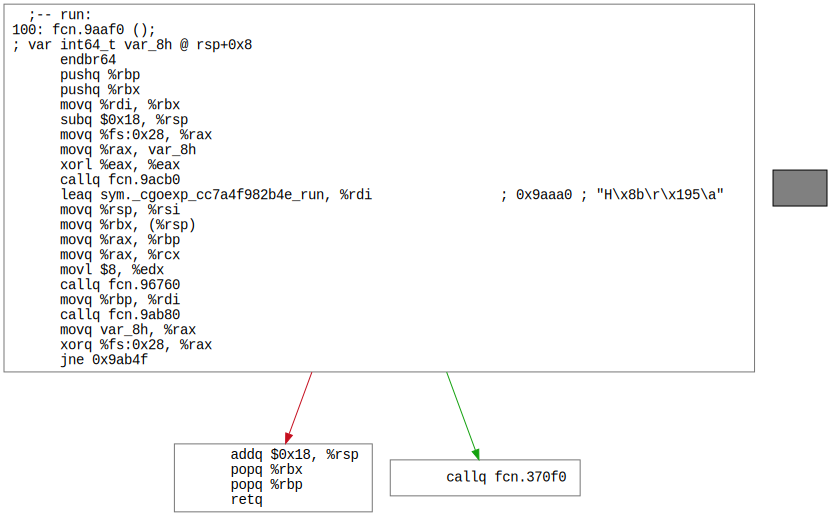

In [14]:
built[0].cfg("run")